In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd

#Load the dataset
data = pd.read_csv("https://raw.githubusercontent.com/Pankaj-Str/Complete-Python-Mastery/refs/heads/main/54%20Day%20Case%20Study/02/sales_data.csv")

#Showed first five rows
print(data.head())

         Date     Store         City  Revenue Product Category  Quantity  \
0  2023-04-13   Store_2      Phoenix      321             Toys         2   
1  2024-03-11  Store_10      Houston     1513        Groceries         8   
2  2023-12-15   Store_2  Los Angeles     1821        Furniture         9   
3  2023-09-28  Store_10  Los Angeles     1312         Clothing         7   
4  2023-04-17   Store_1      Chicago      426         Clothing         3   

   Employees  Transactions  Payment Method  Discount  Customer_Age  \
0         28            17  Online Payment     13.82            27   
1          6            36  Online Payment     21.60            56   
2         26            19      Debit Card     49.02            45   
3          7            64     Credit Card      3.38            66   
4         16            91  Online Payment     25.94            53   

  Customer_Gender  
0      Non-binary  
1      Non-binary  
2      Non-binary  
3          Female  
4            Male  


In [5]:
#Data cleaning

#Check data for missing values
print("\nChecking data for missing values in dataset")
print(data.isnull().sum())


Checking data for missing values in dataset
Date                0
Store               0
City                0
Revenue             0
Product Category    0
Quantity            0
Employees           0
Transactions        0
Payment Method      0
Discount            0
Customer_Age        0
Customer_Gender     0
dtype: int64


In [6]:
#Get summary statistics of numerical columns.
print(f"Summary statistics of numerical column")
print(data.describe())

Summary statistics of numerical column
           Revenue    Quantity   Employees  Transactions    Discount  \
count   500.000000  500.000000  500.000000    500.000000  500.000000   
mean   1021.052000    5.088000   16.922000     49.048000   24.946460   
std     554.294483    2.506955    7.251557     28.144305   14.422932   
min      51.000000    1.000000    5.000000      1.000000    0.100000   
25%     547.750000    3.000000   10.750000     25.000000   12.245000   
50%    1025.500000    5.000000   17.000000     48.500000   25.750000   
75%    1465.500000    7.000000   23.000000     74.000000   36.910000   
max    1999.000000    9.000000   29.000000     99.000000   49.940000   

       Customer_Age  
count    500.000000  
mean      43.864000  
std       14.818931  
min       18.000000  
25%       31.750000  
50%       43.000000  
75%       57.000000  
max       69.000000  


In [7]:
#Find the number of unique stores and unique products in the dataset.
unique_stores = data['Store'].nunique()
unique_product = data['Product Category'].nunique()
print(f"The number of unique stores: {unique_stores}")
print(f"The number of unique products are: {unique_product}")

The number of unique stores: 10
The number of unique products are: 5


In [8]:
print(data.dtypes)

Date                 object
Store                object
City                 object
Revenue               int64
Product Category     object
Quantity              int64
Employees             int64
Transactions          int64
Payment Method       object
Discount            float64
Customer_Age          int64
Customer_Gender      object
dtype: object


In [9]:
#convert date col to date and time
data['Date'] = pd.to_datetime(data['Date'])

In [10]:
print(data.dtypes)

Date                datetime64[ns]
Store                       object
City                        object
Revenue                      int64
Product Category            object
Quantity                     int64
Employees                    int64
Transactions                 int64
Payment Method              object
Discount                   float64
Customer_Age                 int64
Customer_Gender             object
dtype: object


In [11]:
#remove duplicates
data = data.drop_duplicates()
print(data.head())

        Date     Store         City  Revenue Product Category  Quantity  \
0 2023-04-13   Store_2      Phoenix      321             Toys         2   
1 2024-03-11  Store_10      Houston     1513        Groceries         8   
2 2023-12-15   Store_2  Los Angeles     1821        Furniture         9   
3 2023-09-28  Store_10  Los Angeles     1312         Clothing         7   
4 2023-04-17   Store_1      Chicago      426         Clothing         3   

   Employees  Transactions  Payment Method  Discount  Customer_Age  \
0         28            17  Online Payment     13.82            27   
1          6            36  Online Payment     21.60            56   
2         26            19      Debit Card     49.02            45   
3          7            64     Credit Card      3.38            66   
4         16            91  Online Payment     25.94            53   

  Customer_Gender  
0      Non-binary  
1      Non-binary  
2      Non-binary  
3          Female  
4            Male  


In [12]:
#Sales Analysis
#Calculate the total number of transactions recorded in the dataset.
total_transactions = data['Transactions'].sum()
print(f"The total number of transactions are: {total_transactions}")

The total number of transactions are: 24524


In [13]:
#Identify the store location with the highest total sales revenue.
High_sale_store = data.groupby('Store')['Revenue'].sum().idxmax()
print(f"The store with the highest sale is: {High_sale_store}")

The store with the highest sale is: Store_10


In [14]:
#List the top 5 cities in terms of total sales.
print(f"The top 5 cities in terms of total sales are")
print(data.groupby('City')['Revenue'].sum().sort_values(ascending=False))

The top 5 cities in terms of total sales are
City
Chicago        107678
New York       106089
Los Angeles    104965
Phoenix         98623
Houston         93171
Name: Revenue, dtype: int64


In [15]:
#Determine the most sold product category.
popular_category = data.groupby('Product Category')['Quantity'].sum().idxmax()
print(f"The most sold product category is: {popular_category}")

The most sold product category is: Clothing


In [16]:
#Find the store with the highest average transaction value.
high_avg_tran = data.groupby('Store')['Transactions'].mean().idxmax()
print(f"The store with the highest average transaction value is : {high_avg_tran}")

The store with the highest average transaction value is : Store_8


In [32]:
#Calculate the total revenue generated by each store.
store_revenue = data.groupby('Store')['Revenue'].sum()
print(f"The total revenue generated by each store.")
print(store_revenue)

The total revenue generated by each store.
Store
Store_1     61734
Store_10    78093
Store_2     46645
Store_3     48520
Store_4     39991
Store_5     64218
Store_6     51657
Store_7     45679
Store_8     35540
Store_9     38449
Name: Revenue, dtype: int64


In [18]:
#Identify stores with the lowest total revenue.
print(f"stores with the lowest total revenue")
print(data.groupby('Store')['Revenue'].sum().sort_values().head())

stores with the lowest total revenue
Store
Store_8    35540
Store_9    38449
Store_4    39991
Store_7    45679
Store_2    46645
Name: Revenue, dtype: int64


In [19]:
#Advanced insights
#Compute the revenue generated per employee for each store.
print(f"The revenue generated per employee for each store.\nShowing only five records")
data['Revenue_employee'] = data['Revenue']/data['Employees']
print(data['Revenue_employee'].head())

The revenue generated per employee for each store.
Showing only five records
0     11.464286
1    252.166667
2     70.038462
3    187.428571
4     26.625000
Name: Revenue_employee, dtype: float64


In [20]:
#Find the city with the highest number of transactions.
city_high_tran = data.groupby('City')['Transactions'].sum().idxmax()
print(f"The city with the highest number of transactions is {city_high_tran}")

The city with the highest number of transactions is Chicago


In [21]:
#Analyze how revenue trends over time (e.g., monthly or yearly).
data['Date'] = pd.to_datetime(data['Date'])

#Extracr the month from the 'Date' column
data['Month'] = data['Date'].dt.month

#Group by month and calculate the total sales for each group
monthly_sales = data.groupby('Month')['Revenue'].sum()

#Print the monthly sales
print(monthly_sales)

Month
1     49762
2     61056
3     47679
4     66539
5     45342
6     36034
7     34038
8     35510
9     30224
10    36176
11    30232
12    37934
Name: Revenue, dtype: int64


In [22]:
#Identify the best-selling product based on quantity sold.
top_sold_prod = data.groupby('Product Category')['Quantity'].sum().idxmax()
print(f"The best-selling product based on quantity sold is {top_sold_prod}")


The best-selling product based on quantity sold is Clothing


In [23]:
#Determine which store has the highest number of transactions.
high_tran = data.groupby('Store')['Transactions'].sum().idxmax()
print(f"The store which has the highest number of transactions is {high_tran}.")

The store which has the highest number of transactions is Store_10.


In [24]:
#Compute the average revenue per transaction across all stores.
data['revenue_transaction'] = data['Revenue'].sum()/data['Transactions'].sum()

print(f"The average revenue per transaction across all stores")
print(data['revenue_transaction'].head())


The average revenue per transaction across all stores
0    20.817403
1    20.817403
2    20.817403
3    20.817403
4    20.817403
Name: revenue_transaction, dtype: float64


In [25]:
#Identify the month with the highest sales.
#Analyze how revenue trends over time (e.g., monthly or yearly).
data['Date'] = pd.to_datetime(data['Date'])

#Extracr the month from the 'Date' column
data['Month'] = data['Date'].dt.month

#Group by month and calculate the total sales for each group
monthly_sales = data.groupby('Month')['Revenue'].sum().idxmax()

#Print the monthly sales
print(f"The month with the highest sales is {monthly_sales} which is April")


The month with the highest sales is 4 which is April


In [26]:
#Find out which day of the week has the highest sales.
data['Day_of_week'] = data['Date'].dt.day_name()
high_sale_day = data.groupby('Day_of_week')['Revenue'].sum().idxmax()
print(f"The day of the week which has the highest sales is {high_sale_day}")

The day of the week which has the highest sales is Monday


In [27]:
#Compare sales between weekdays and weekends.
data['Weekday'] = data['Date'].dt.weekday
data['Is_Weekend'] = data['Weekday'] >=5
print(data.groupby('Is_Weekend')['Revenue'].sum())

Is_Weekend
False    352375
True     158151
Name: Revenue, dtype: int64


In [42]:
#Calculate total revenue based on different payment methods.
payment_revenue = data.groupby('Payment Method')['Revenue'].sum()
print(f"Calculated the total revenue based on different payment methods")
print(payment_revenue)

Calculated the total revenue based on different payment methods
Payment Method
Cash              130059
Credit Card       141408
Debit Card        104139
Online Payment    134920
Name: Revenue, dtype: int64


In [29]:
#Analyze the correlation between discounts and revenue.
print(f"Analyzed the correlation between discounts and revenue")
print(data[['Discount', 'Revenue']].corr())

Analyzed the correlation between discounts and revenue
          Discount   Revenue
Discount  1.000000  0.033525
Revenue   0.033525  1.000000


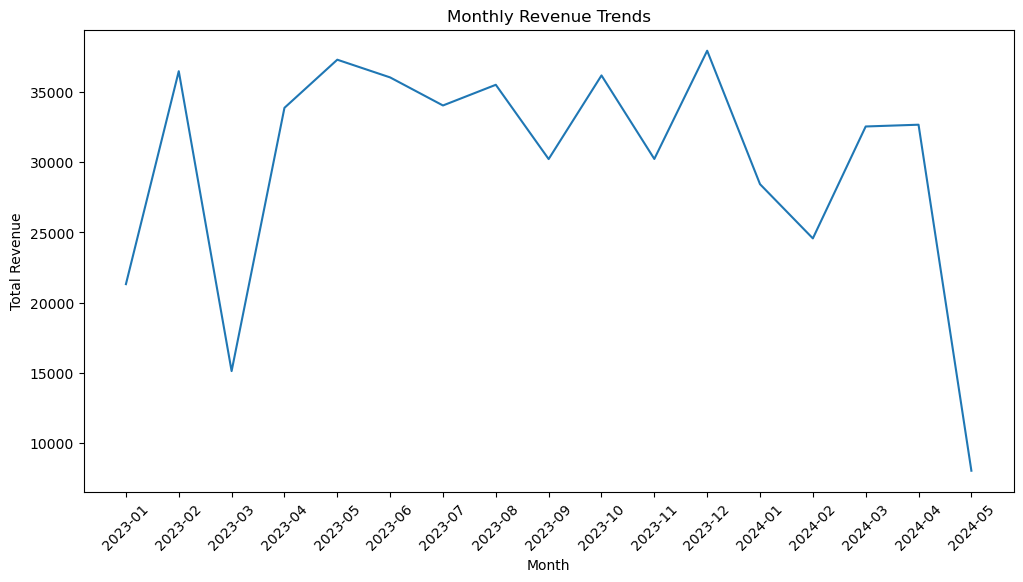

In [40]:
# Revenue trends over time
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.to_period('M')
monthly_revenue = data.groupby('Month')['Revenue'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index.astype(str), y=monthly_revenue.values)
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

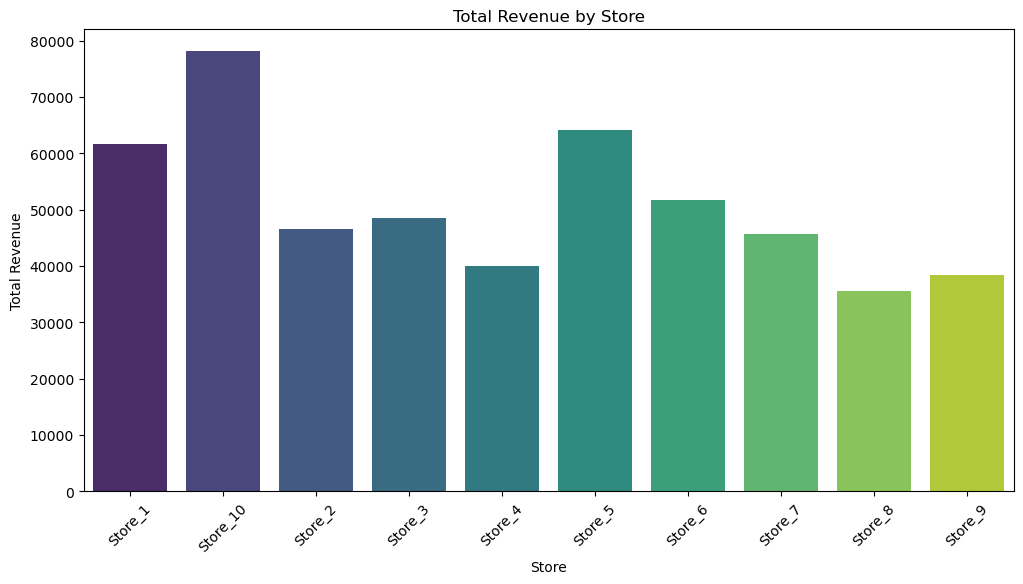

In [41]:
# Visualization - Revenue by store
plt.figure(figsize=(12, 6))
sns.barplot(x=store_revenue.index, y=store_revenue.values, palette='viridis', hue=store_revenue.index, legend=False)
plt.xticks(rotation=45)
plt.title("Total Revenue by Store")
plt.xlabel("Store")
plt.ylabel("Total Revenue")
plt.show()

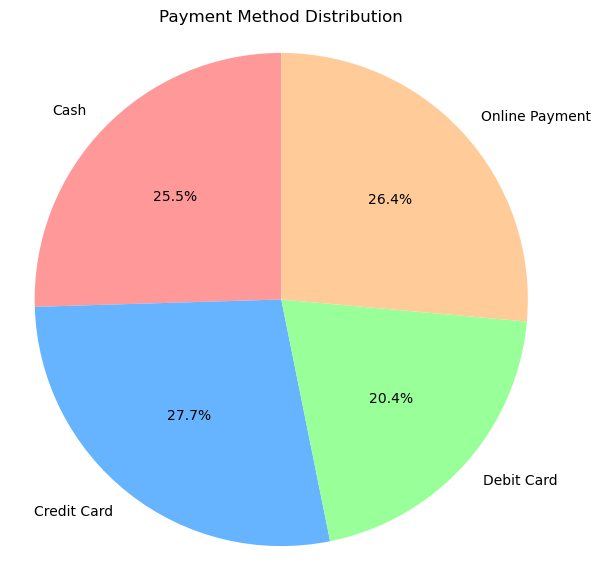

In [ ]:
# Plot the Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(payment_revenue, labels=payment_revenue.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])

# Formatting
plt.title("Payment Method Distribution")
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()